# NAIVE BAYES CLASSIFIER

### 1)BAG OF WORDS

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

C:\Users\vishu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#creating conectionwith the sqlite file
con = sqlite3.connect('final.sqlite') 

#Reading the entire data from the file and storing it into a dataframe...
data = pd.read_sql_query("select * from Reviews", con)
#data.head()

In [3]:
data.shape

(364171, 12)

In [4]:
data["Score"].value_counts()

positive    307061
negative     57110
Name: Score, dtype: int64

In [5]:
data=data.sort_values(by='Time',ascending=True).reset_index()

In [6]:
data['Score']=data['Score'].map({'negative':0, 'positive':1})

In [7]:
# Text to vector conversion..for Training dataset
# Creating bag of words on the Training set...
#BoW
count_vect = CountVectorizer() #in scikit-learn
bow = count_vect.fit_transform(data["CleanedText"].values)

In [9]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data_bow = StandardScaler(with_mean=False).fit_transform(bow)
print(standardized_data_bow.shape)

C:\Users\vishu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


(364171, 71624)


In [10]:
del standardized_data

In [11]:
# split the data set into train and test
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(standardized_data_bow,data["Score"].values, test_size=0.3, random_state=0)


The optimal value of alpha is 0.001


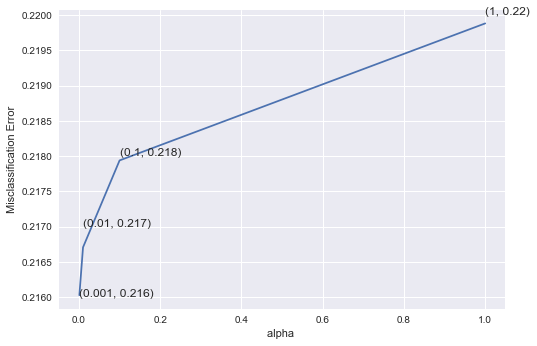

the misclassification error for each alpha value is :  [ 0.216  0.217  0.218  0.22 ]


In [17]:
from sklearn.naive_bayes import MultinomialNB
#creating a list of alpha values
mylist=[10**-3,10**-2,10**-1,10**0]

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for a in mylist:
    mnb = MultinomialNB(alpha=a)
    scores = cross_val_score(mnb,X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best alpha
optimal_a_bow = mylist[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is {}'.format(optimal_a_bow))

# plot misclassification error vs alpha 
plt.plot(mylist, MSE)

for xy in zip(mylist, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('alpha ')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each alpha value is : ", np.round(MSE,3))

In [27]:
# instantiate learning model alpha = optimal_a_bow
mnb_optimal_bow =MultinomialNB(alpha=optimal_a_bow)

# fitting the model
mnb_optimal_bow.fit(X_train, Y_train)

# predict the response
pred_bow_test = mnb_optimal_bow.predict(X_test)

# evaluate accuracy
acc_bow_test = accuracy_score(Y_test, pred_bow_test) * 100
print('\nThe accuracy on test set of the MultinomialNB classifier for alpha = {}'.format((optimal_a_bow, acc_bow_test)))


The accuracy on test set of the MultinomialNB classifier for alpha = (0.001, 78.497418811554937)


In [28]:
#checking train accuracy
# predict the response
pred_bow_train = mnb_optimal_bow.predict(X_train)
# evaluate accuracy
acc_bow_train = accuracy_score(Y_train, pred_bow_train) * 100
print('\nThe accuracy on training set of the MultinomialNB classifier for alpha = {}'.format((optimal_a_bow, acc_bow_train)))



The accuracy on training set of the MultinomialNB classifier for alpha = (0.001, 86.56161368905417)


In [24]:
#Confusion matrix.....
#Classification Report......
from sklearn.metrics import classification_report
results = confusion_matrix(Y_test, pred_bow_test)
print('CONFUSION MATRIX :')
print()
print(results)
print()
print('ACCURACY SCORE :',accuracy_score(Y_test, pred_bow_test)) 
print()
print('REPORT : ') 
print(classification_report(Y_test, pred_bow_test)) 

CONFUSION MATRIX :

[[12111  5102]
 [18390 73649]]

ACCURACY SCORE : 0.784974188116

REPORT : 
             precision    recall  f1-score   support

          0       0.40      0.70      0.51     17213
          1       0.94      0.80      0.86     92039

avg / total       0.85      0.78      0.81    109252



## 2) BINARY-BAG OF WORDS

In [31]:
# Text to vector conversion..for Training dataset
# Creating bag of words on the Training set...
#Binary BoW
count_vect = CountVectorizer(binary=True) #in scikit-learn
binary_bow = count_vect.fit_transform(data["CleanedText"].values)

In [34]:
binary_bow.shape

(364171, 71624)

In [36]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data_binary_bow = StandardScaler(with_mean=False).fit_transform(binary_bow)
print(standardized_data_binary_bow.shape)

C:\Users\vishu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


(364171, 71624)


In [37]:
# split the data set into train and test
X_train_binary_bow, X_test_binary_bow, Y_train_binary_bow, Y_test_binary_bow = cross_validation.train_test_split(standardized_data_binary_bow,data["Score"].values, test_size=0.3, random_state=0)


The optimal value of alpha is 0.01


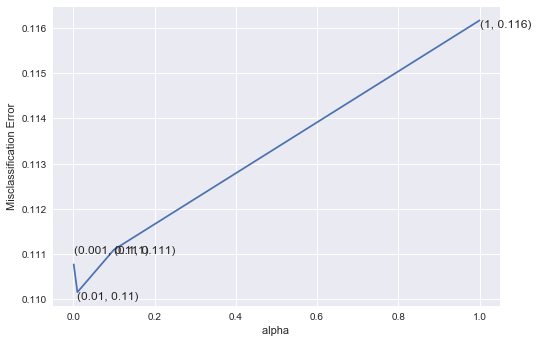

the misclassification error for each alpha value is :  [ 0.111  0.11   0.111  0.116]


In [38]:
from sklearn.naive_bayes import BernoulliNB
#creating a list of alpha values
mylist=[10**-3,10**-2,10**-1,10**0]

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for a in mylist:
    bnb = BernoulliNB(alpha=a)
    scores = cross_val_score(bnb,X_train_binary_bow, Y_train_binary_bow, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best alpha
optimal_a_binary_bow = mylist[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is {}'.format(optimal_a_binary_bow))

# plot misclassification error vs alpha 
plt.plot(mylist, MSE)

for xy in zip(mylist, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('alpha ')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each alpha value is : ", np.round(MSE,3))

In [39]:
# instantiate learning model alpha = optimal_a_bow
bnb_optimal_bow =BernoulliNB(alpha=optimal_a_binary_bow)

# fitting the model
bnb_optimal_bow.fit(X_train_binary_bow, Y_train_binary_bow)

# predict the response
pred_binary_bow_test = bnb_optimal_bow.predict(X_test_binary_bow)

# evaluate accuracy
acc_binary_bow_test = accuracy_score(Y_test_binary_bow,pred_binary_bow_test) * 100
print('\nThe accuracy on test set of the BernoulliNB classifier for alpha = {}'.format((optimal_a_binary_bow, acc_binary_bow_test)))


The accuracy on test set of the BernoulliNB classifier for alpha = (0.01, 88.906381576538635)


In [40]:
# predict the response on Training set
pred_binary_bow_train = bnb_optimal_bow.predict(X_train_binary_bow)

# evaluate accuracy
acc_binary_bow_train = accuracy_score(Y_train_binary_bow,pred_binary_bow_train) * 100
print('\nThe accuracy on Training set of the BernoulliNB classifier for alpha = {}'.format((optimal_a_binary_bow, acc_binary_bow_train)))


The accuracy on Training set of the BernoulliNB classifier for alpha = (0.01, 91.216033328233664)


In [41]:
#Confusion matrix.....
#Classification Report......
from sklearn.metrics import classification_report
results = confusion_matrix(Y_test_binary_bow, pred_binary_bow_test)
print('CONFUSION MATRIX :')
print()
print(results)
print()
print('ACCURACY SCORE :',accuracy_score(Y_test_binary_bow, pred_binary_bow_test)) 
print()
print('REPORT : ') 
print(classification_report(Y_test_binary_bow, pred_binary_bow_test)) 

CONFUSION MATRIX :

[[11166  6047]
 [ 6073 85966]]

ACCURACY SCORE : 0.889063815765

REPORT : 
             precision    recall  f1-score   support

          0       0.65      0.65      0.65     17213
          1       0.93      0.93      0.93     92039

avg / total       0.89      0.89      0.89    109252



# 3) TF-IDF

In [42]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(data['CleanedText'].values)

In [43]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data_tf = StandardScaler(with_mean=False).fit_transform(final_tf_idf)
print(standardized_data_tf.shape)

(364171, 2923725)


In [44]:
# split the data set into train and test
X_train_tf, X_test_tf, Y_train_tf, Y_test_tf = cross_validation.train_test_split(standardized_data_tf,data["Score"].values, test_size=0.3, random_state=0)


The optimal value of alpha is 0.001


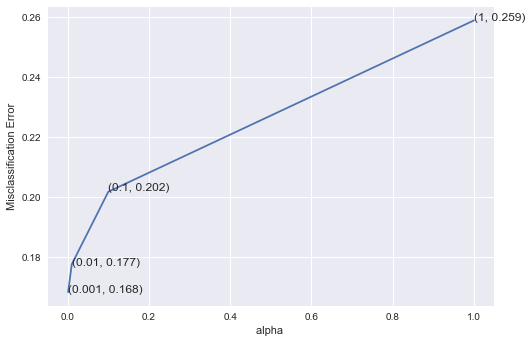

the misclassification error for each alpha value is :  [ 0.168  0.177  0.202  0.259]


In [45]:
from sklearn.naive_bayes import MultinomialNB
#creating a list of alpha values
mylist=[10**-3,10**-2,10**-1,10**0]

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for a in mylist:
    mnb = MultinomialNB(alpha=a)
    scores = cross_val_score(mnb,X_train_tf, Y_train_tf, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best alpha
optimal_a_tf = mylist[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is {}'.format(optimal_a_tf))

# plot misclassification error vs alpha 
plt.plot(mylist, MSE)

for xy in zip(mylist, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('alpha ')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each alpha value is : ", np.round(MSE,3))

In [47]:
# instantiate learning model alpha = optimal_a_bow
mnb_optimal_tf =MultinomialNB(alpha=optimal_a_tf)

# fitting the model
mnb_optimal_tf.fit(X_train_tf, Y_train_tf)

# predict the response
pred_tf_test = mnb_optimal_tf.predict(X_test_tf)

# evaluate accuracy
acc_tf_test = accuracy_score(Y_test_tf, pred_tf_test) * 100
print('\nThe accuracy on test set of the MultinomialNB classifier for alpha = {}'.format((optimal_a_tf, acc_tf_test)))


The accuracy on test set of the MultinomialNB classifier for alpha = (0.001, 83.138066122359305)


In [49]:
#checking train accuracy
# predict the response
pred_tf_train = mnb_optimal_tf.predict(X_train_tf)
# evaluate accuracy
acc_tf_train = accuracy_score(Y_train_tf, pred_tf_train) * 100
print('\nThe accuracy on training set of the MultinomialNB classifier for alpha = {}'.format((optimal_a_tf, acc_tf_train)))



The accuracy on training set of the MultinomialNB classifier for alpha = (0.001, 99.809743487146889)


In [50]:
#Confusion matrix.....
#Classification Report......
from sklearn.metrics import classification_report
results = confusion_matrix(Y_test_tf, pred_tf_test)
print('CONFUSION MATRIX :')
print()
print(results)
print()
print('ACCURACY SCORE :',accuracy_score(Y_test_tf, pred_tf_test)) 
print()
print('REPORT : ') 
print(classification_report(Y_test_tf, pred_tf_test)) 

CONFUSION MATRIX :

[[ 6884 10329]
 [ 8093 83946]]

ACCURACY SCORE : 0.831380661224

REPORT : 
             precision    recall  f1-score   support

          0       0.46      0.40      0.43     17213
          1       0.89      0.91      0.90     92039

avg / total       0.82      0.83      0.83    109252



# SUMMARY

In [54]:
from prettytable import PrettyTable
t = PrettyTable(["Sno","MODEL", "HYPERPARAMETER(alpha)", "TRAIN ERROR(in %)","TEST ERROR(in %)"])
t.add_row([1,"Bag of Words(MultinomialNB)",optimal_a_bow,(100.0-acc_bow_train),(100.0-acc_bow_test)])
t.add_row([2,"Binary Bag of Words(BernouliNB)",optimal_a_binary_bow,(100.0-acc_binary_bow_train),(100.0-acc_binary_bow_test)])
t.add_row([3,"TFIDF(MultinomialNB)",optimal_a_tf,(100.0-acc_tf_train),(100.0-acc_tf_test)])
print(t)

+-----+---------------------------------+-----------------------+-------------------+------------------+
| Sno |              MODEL              | HYPERPARAMETER(alpha) | TRAIN ERROR(in %) | TEST ERROR(in %) |
+-----+---------------------------------+-----------------------+-------------------+------------------+
|  1  |   Bag of Words(MultinomialNB)   |         0.001         |   13.4383863109   |  21.5025811884   |
|  2  | Binary Bag of Words(BernouliNB) |          0.01         |   8.78396667177   |  11.0936184235   |
|  3  |       TFIDF(MultinomialNB)      |         0.001         |   0.190256512853  |  16.8619338776   |
+-----+---------------------------------+-----------------------+-------------------+------------------+
